In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import pandas as pd


In [2]:
df = pd.read_csv("/content/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations.

In this project, I will use this data to predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainTomorrow", indicating whether or not it will rain the next day or not.

In [3]:
df.shape

(145460, 23)

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
nll=df.isnull().sum()
nll

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
nll/df.shape[0]*100 # Some features have 40 to 50 percentage of null values

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

## Correlation

<Axes: >

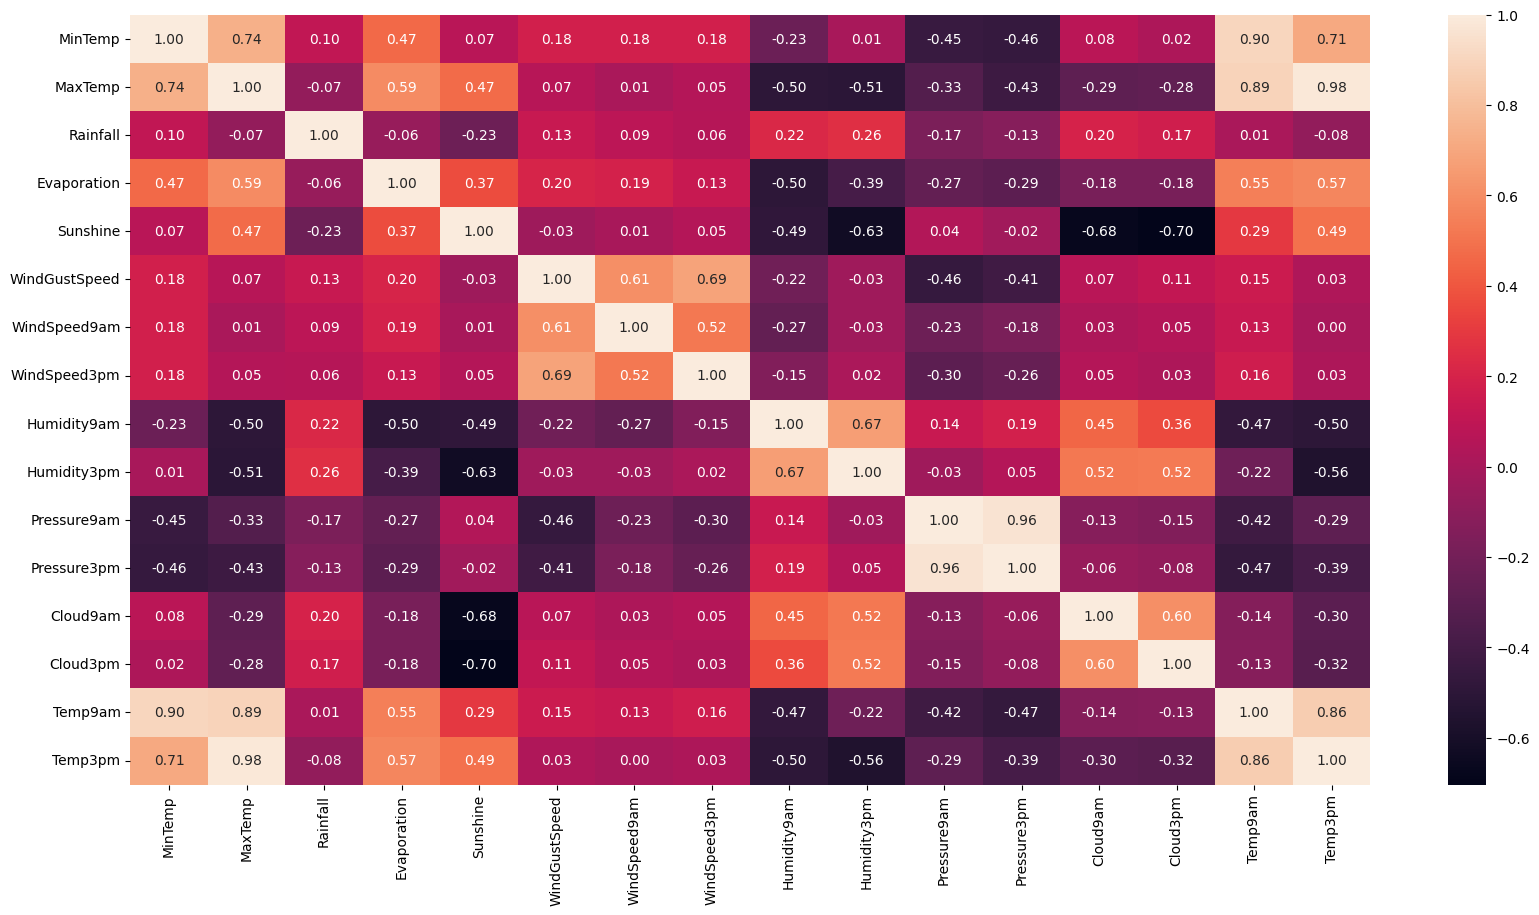

In [8]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,fmt='.2f')

<Axes: >

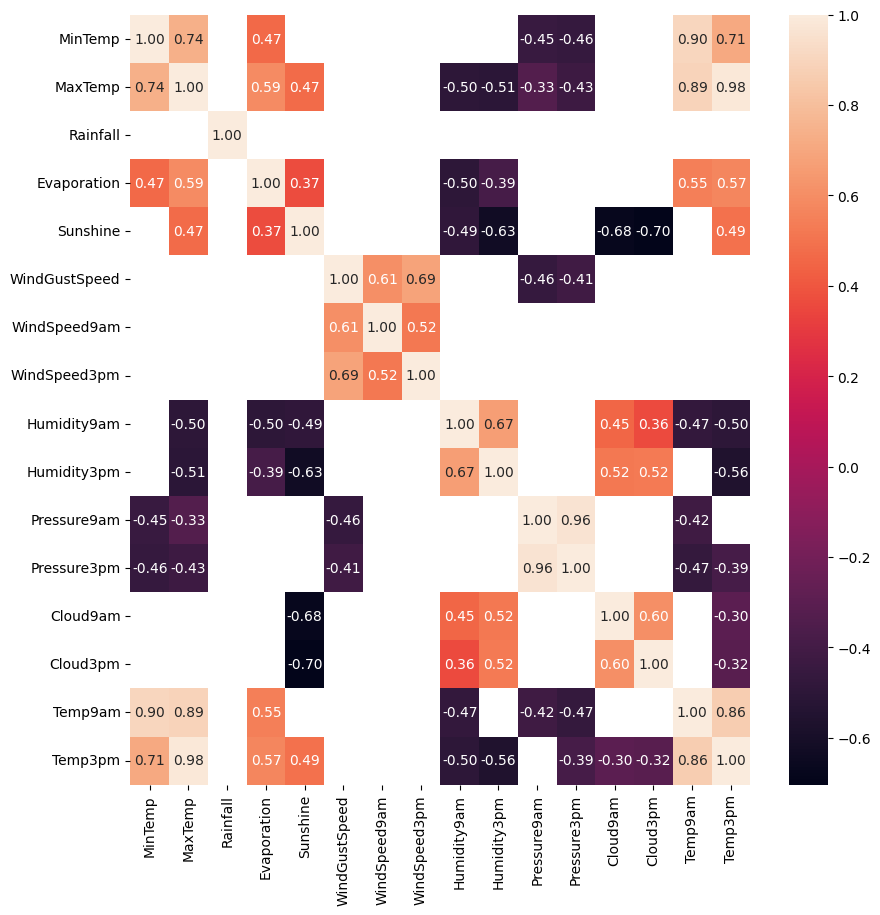

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[(corr>0.3) |(corr<-0.3)],annot=True,fmt='.2f')
#we have good correlation

## Imbalanced Data:

In [10]:
df['RainTomorrow'].value_counts()
#Imbalaced Data

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

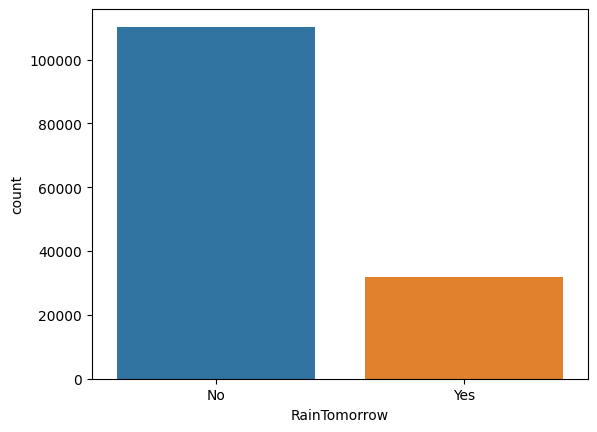

In [11]:
sns.countplot(x=df['RainTomorrow'])

## Dealing with the Categorical Columns

In [12]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [13]:
# Separating dates by Day, Month, and Year
df_categorical['Date']=pd.to_datetime(df_categorical['Date'])
df_categorical['Year']=df_categorical['Date'].dt.year
df_categorical['Month']=df_categorical['Date'].dt.month
df_categorical['Day']=df_categorical['Date'].dt.day
df_categorical.drop('Date',axis=1,inplace=True)

In [14]:
df_categorical.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,W,W,WNW,No,No,2008,12,1
1,Albury,WNW,NNW,WSW,No,No,2008,12,2
2,Albury,WSW,W,WSW,No,No,2008,12,3
3,Albury,NE,SE,E,No,No,2008,12,4
4,Albury,W,ENE,NW,No,No,2008,12,5


In [15]:
df_categorical.columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [16]:
for i in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow']:
       print(df[i].value_counts())

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [17]:
df_categorical.isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
Year                0
Month               0
Day                 0
dtype: int64

In [18]:
#One Hot Encoding
#The reason why I chose one hot encoding is that I did not want my model to prioritize any feature values, as label encoding would do.

df_categorical_dummie=pd.get_dummies(df_categorical,drop_first=True)
df_categorical_dummie.columns

#Disadvantage: The result will be a sparse dataframe (containing only 0 and 1 values)

Index(['Year', 'Month', 'Day', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Penrith', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Richmond', 'Location_Sale',
       'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_Tuggeranong', 'Location_U

## Dealing with the Numerical columns

In [19]:
df_numerical=df.select_dtypes(include=['int64','float64'])
df_numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [20]:
#Null Values
df_numerical.isnull().sum()/df_numerical.shape[0]*100

MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustSpeed     7.055548
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
dtype: float64

In [21]:
#We filled the median values in numerical data, since we knew that the value of temperature, humidity, etc would be mainly in a range
for i in df_numerical.columns:
  df_numerical.fillna(df_numerical[i].median(),inplace=True)

In [22]:
df_numerical.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

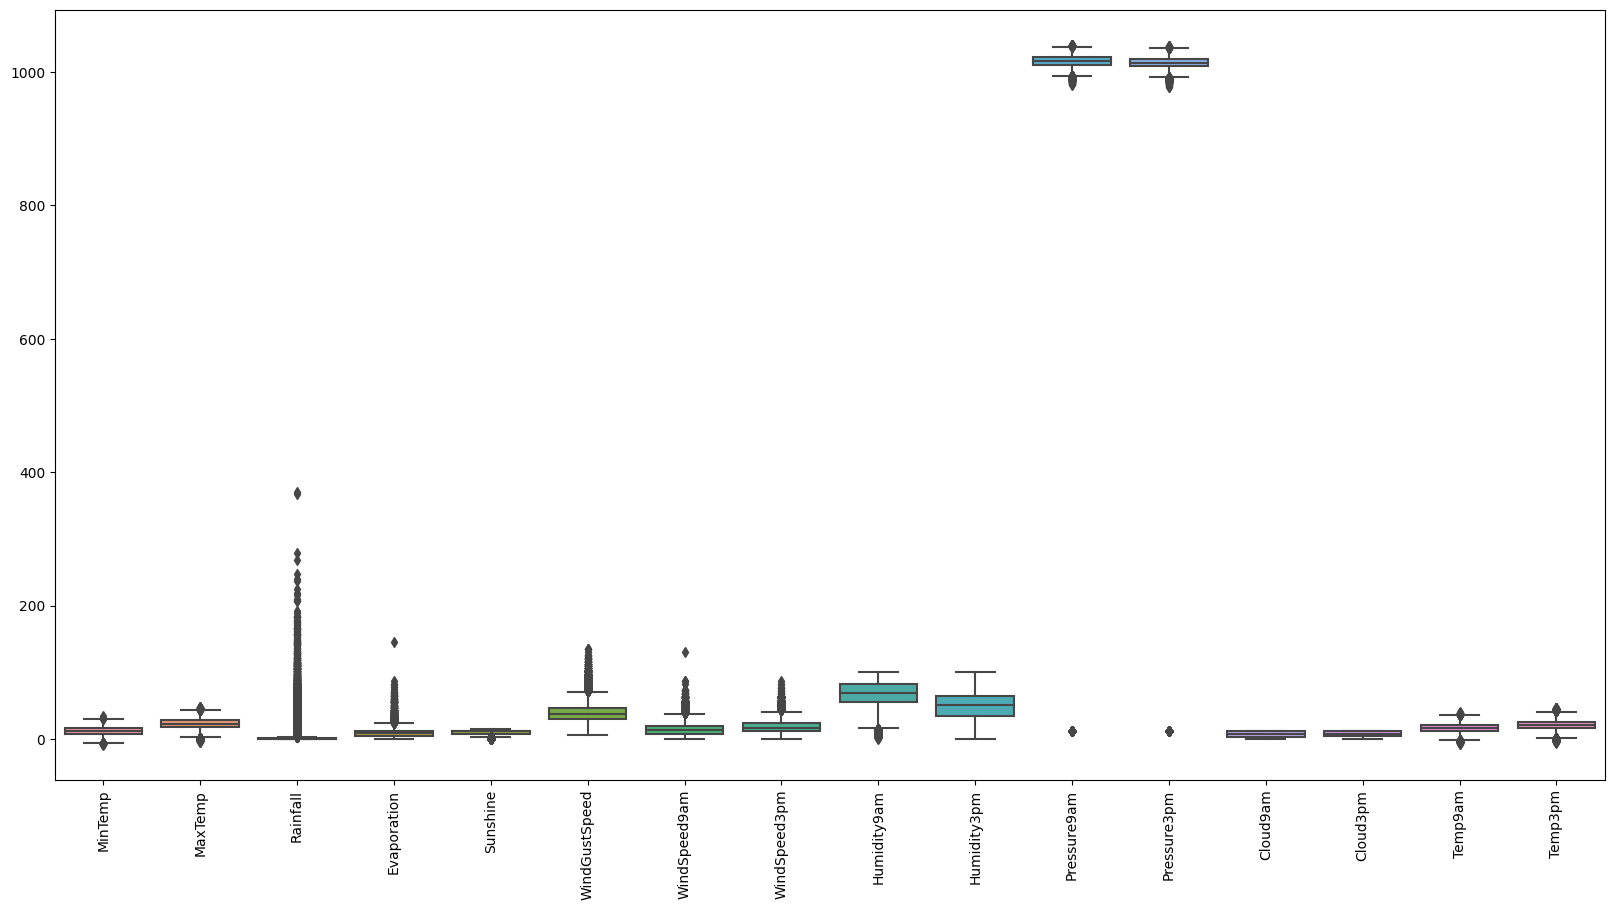

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(df_numerical)
plt.xticks(rotation=90)
plt.show()
# So many outliers


## Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
df_numerical_scaled=sd.fit_transform(df_numerical)

In [25]:
df_numerical_scaled=pd.DataFrame(df_numerical_scaled,columns=df_numerical.columns)

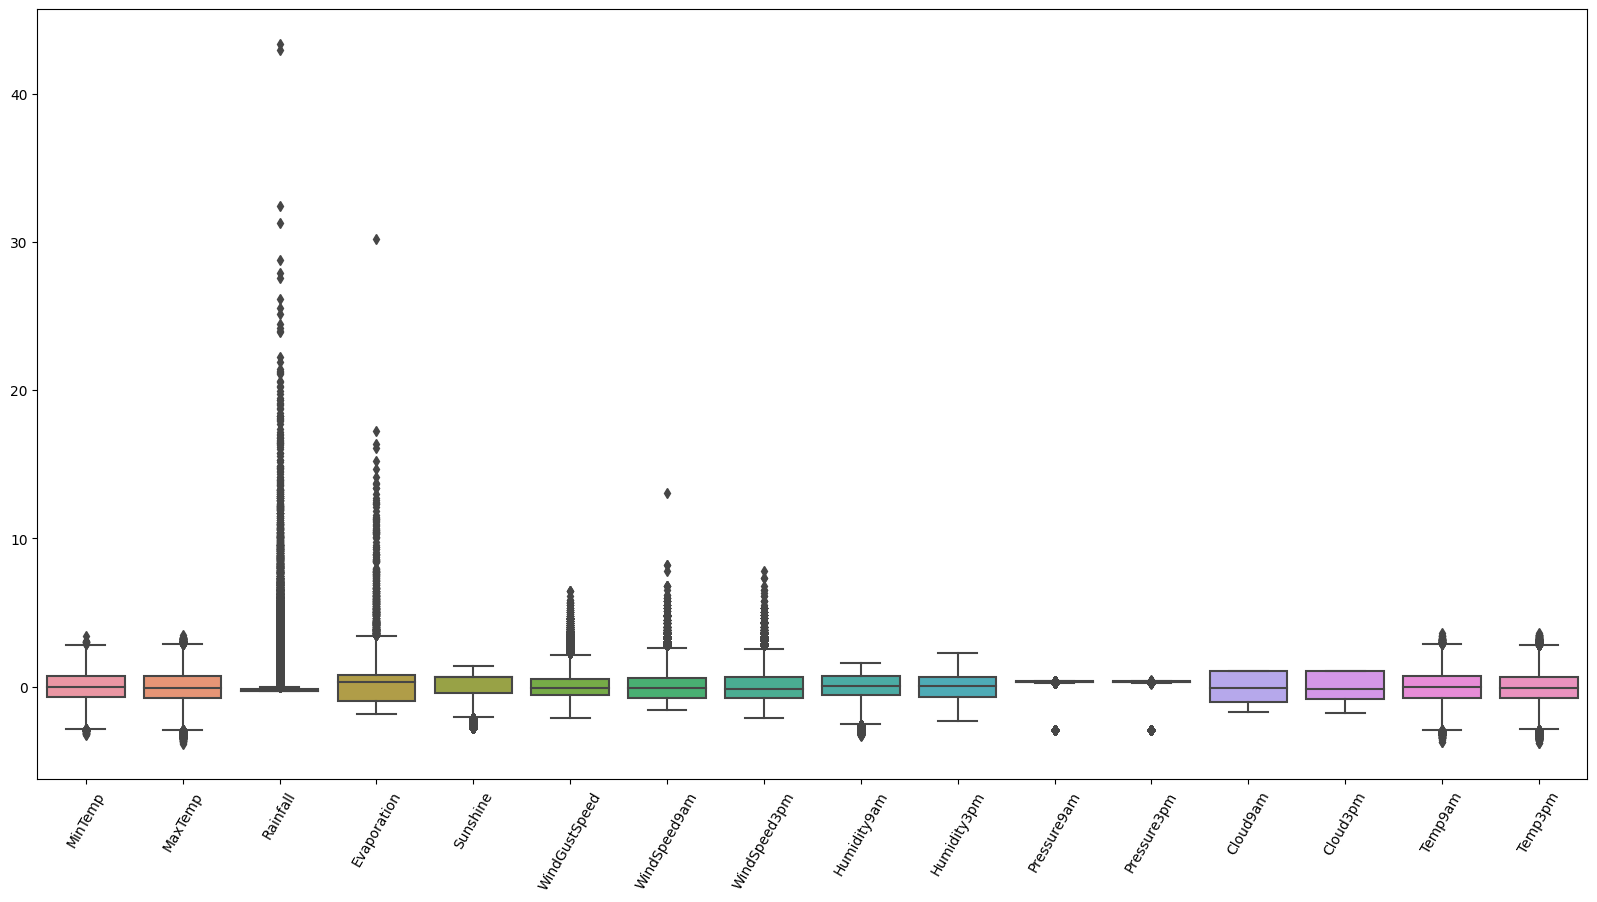

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(df_numerical_scaled)
plt.xticks(rotation=60)
plt.show()
#As we can see, there are many outliers

In [27]:
final=pd.concat([df_categorical_dummie,df_numerical_scaled],axis=1)

# Removing Outliers using IQR

In [28]:
df_numerical.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [29]:
df_clean=final.copy()
num_cols=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']
q1=df_clean[num_cols].quantile(0.25)
q3=df_clean[num_cols].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
hb=q3+1.5*iqr
for i in num_cols:
  df_clean=df_clean[(df_clean[i]>=lb[i]) & (df_clean[i]<=hb[i])]

In [30]:
df_clean.head()

,Year,Month,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008,12,1,0,1,0,0,0,0,0,...,0.674808,0.624664,0.155260,-1.311614,0.307357,0.312653,0.150770,1.046998,-0.004636,0.050881
1,2008,12,2,0,1,0,0,0,0,0,...,-1.130276,0.396584,-1.172592,-1.172643,0.316819,0.314945,1.077540,1.046998,0.041715,0.407327
2,2008,12,3,0,1,0,0,0,0,0,...,0.561990,0.852744,-1.467670,-0.941023,0.307030,0.317891,1.077540,-1.314515,0.628830,0.250491
3,2008,12,4,0,1,0,0,0,0,0,...,-0.340552,-1.085933,-1.123412,-1.589557,0.339657,0.331315,1.077540,1.046998,0.180768,0.721000
4,2008,12,5,0,1,0,0,0,0,0,...,-0.791823,0.168505,0.696237,-0.802052,0.317471,0.309051,-0.080922,0.102393,0.134417,1.177251


In [31]:
#Scaling day,year,month
scale=df_clean[['Day','Year','Month']]
scaled=sd.fit_transform(scale)
scale=pd.DataFrame(scaled,columns=scale.columns)

In [32]:
df_clean.drop(['Day','Year','Month'],axis=1,inplace=True)
final_df=pd.concat([scale.reset_index(),df_clean.reset_index()],axis=1)
final_df.head()

,index,Day,Year,Month,index,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0,-1.672811,-1.877151,1.631595,0,0,1,0,0,0,...,0.674808,0.624664,0.155260,-1.311614,0.307357,0.312653,0.150770,1.046998,-0.004636,0.050881
1,1,-1.559005,-1.877151,1.631595,1,0,1,0,0,0,...,-1.130276,0.396584,-1.172592,-1.172643,0.316819,0.314945,1.077540,1.046998,0.041715,0.407327
2,2,-1.445198,-1.877151,1.631595,2,0,1,0,0,0,...,0.561990,0.852744,-1.467670,-0.941023,0.307030,0.317891,1.077540,-1.314515,0.628830,0.250491
3,3,-1.331391,-1.877151,1.631595,3,0,1,0,0,0,...,-0.340552,-1.085933,-1.123412,-1.589557,0.339657,0.331315,1.077540,1.046998,0.180768,0.721000
4,4,-1.217585,-1.877151,1.631595,4,0,1,0,0,0,...,-0.791823,0.168505,0.696237,-0.802052,0.317471,0.309051,-0.080922,0.102393,0.134417,1.177251


In [33]:
final_df.drop(['index','index'],axis=1,inplace=True)
final_df.head()

,Day,Year,Month,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,-1.672811,-1.877151,1.631595,0,1,0,0,0,0,0,...,0.674808,0.624664,0.155260,-1.311614,0.307357,0.312653,0.150770,1.046998,-0.004636,0.050881
1,-1.559005,-1.877151,1.631595,0,1,0,0,0,0,0,...,-1.130276,0.396584,-1.172592,-1.172643,0.316819,0.314945,1.077540,1.046998,0.041715,0.407327
2,-1.445198,-1.877151,1.631595,0,1,0,0,0,0,0,...,0.561990,0.852744,-1.467670,-0.941023,0.307030,0.317891,1.077540,-1.314515,0.628830,0.250491
3,-1.331391,-1.877151,1.631595,0,1,0,0,0,0,0,...,-0.340552,-1.085933,-1.123412,-1.589557,0.339657,0.331315,1.077540,1.046998,0.180768,0.721000
4,-1.217585,-1.877151,1.631595,0,1,0,0,0,0,0,...,-0.791823,0.168505,0.696237,-0.802052,0.317471,0.309051,-0.080922,0.102393,0.134417,1.177251


In [34]:
final_df.shape

(94602, 114)

# Dealing with Imbalanced Data

In [35]:
from sklearn.model_selection import train_test_split
x=final_df.drop('RainTomorrow_Yes',axis=1)
y=final_df['RainTomorrow_Yes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
x.shape

(94602, 113)

<Axes: xlabel='RainTomorrow_Yes', ylabel='count'>

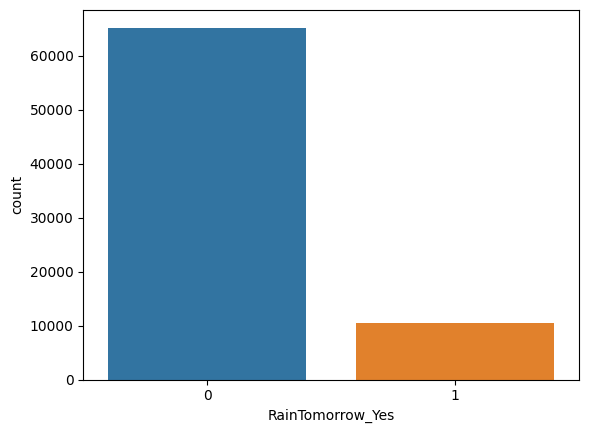

In [37]:
sns.countplot(x=y_train)

## Model Building

In [40]:
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score
from keras import callbacks
import numpy as np

In [41]:
y_train_r=np.asarray(y_train).reshape((-1,1))
y_test_r=np.asarray(y_test).reshape((-1,1))

In [42]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
)
model=Sequential()
model.add(Dense(130,input_dim=113,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train_r,epochs=150,validation_split=0.2,batch_size=40,callbacks=[early_stopping])

Epoch 1/150
1514/1514 [==============================] - 14s 5ms/step - loss: 0.3160 - accuracy: 0.8766 - val_loss: 0.3013 - val_accuracy: 0.8831
Epoch 2/150
1514/1514 [==============================] - 7s 5ms/step - loss: 0.2962 - accuracy: 0.8839 - val_loss: 0.3007 - val_accuracy: 0.8823
Epoch 3/150
1514/1514 [==============================] - 6s 4ms/step - loss: 0.2880 - accuracy: 0.8859 - val_loss: 0.2936 - val_accuracy: 0.8860
Epoch 4/150
1514/1514 [==============================] - 7s 5ms/step - loss: 0.2812 - accuracy: 0.8885 - val_loss: 0.2914 - val_accuracy: 0.8857
Epoch 5/150
1514/1514 [==============================] - 7s 5ms/step - loss: 0.2765 - accuracy: 0.8893 - val_loss: 0.2903 - val_accuracy: 0.8856
Epoch 6/150
1514/1514 [==============================] - 11s 7ms/step - loss: 0.2721 - accuracy: 0.8915 - val_loss: 0.2905 - val_accuracy: 0.8869
Epoch 7/150
1514/1514 [==============================] - 11s 7ms/step - loss: 0.2679 - accuracy: 0.8922 - val_loss: 0.2895 - val

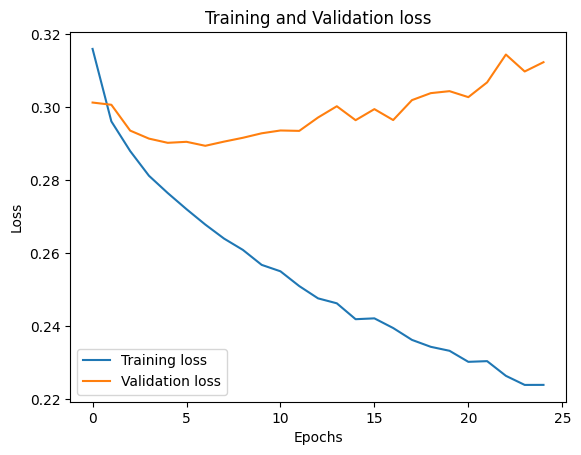

In [43]:
hist_df = pd.DataFrame(history.history)
plt.plot(hist_df.loc[:, ['loss']], label='Training loss')
plt.plot(hist_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.show()

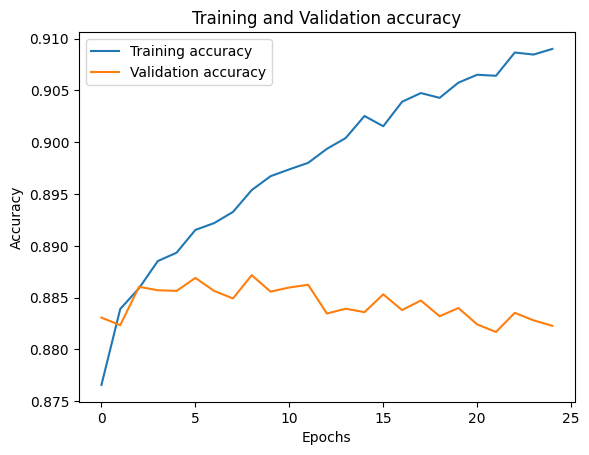

In [44]:
hist_df_acc = pd.DataFrame(history.history)
plt.plot(hist_df_acc.loc[:, ['accuracy']],  label='Training accuracy')
plt.plot(hist_df_acc.loc[:, ['val_accuracy']],  label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [45]:
p = model.predict(x_test)
p=(p>0.5) #Sigmoid give us a probability, so here we are converting(if >0.5 then true,else false)

592/592 [==============================] - 1s 1ms/step


In [46]:
y_test_r

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

<Axes: >

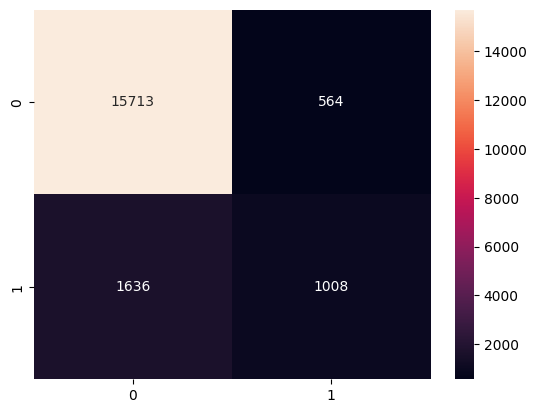

In [47]:
sns.heatmap( confusion_matrix(y_test_r, p),annot=True, fmt='d')

In [48]:
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93     16277
           1       0.64      0.38      0.48      2644

    accuracy                           0.88     18921
   macro avg       0.77      0.67      0.71     18921
weighted avg       0.87      0.88      0.87     18921

